# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [66]:
import pandas as pd
from citipy import citipy
import matplotlib.pyplot as plt
import scipy.stats as sts
from scipy.stats import sem
from scipy.stats import linregress
import os
import random
import numpy as np
import requests
from pprint import pprint
from config import api_key

## Generate Cities List

In [2]:
### Generate a random Lat Long table to generate a cities list:  
latlist = []
longlist = []
for i in range(0,1200):
    latlist.append(float(random.randrange(-90, 90))*1.00249)
    longlist.append(float(random.randrange(-180, 180))*1.00249)

dict_with_lists = {"Latitude": latlist,
                   "Longitude": longlist}
RandomLatLong_df = pd.DataFrame(dict_with_lists)
FinalLatLong_df = RandomLatLong_df.copy()
RandomLatLong_df
# type(FinalLatLong_df)


,Latitude,Longitude
0,20.04980,-124.30876
1,38.09462,34.08466
2,60.14940,74.18426
3,76.18924,-57.14193
4,-2.00498,-35.08715
...,...,...
1195,29.07221,-13.03237
1196,82.20418,145.36105
1197,-47.11703,-166.41334
1198,41.10209,112.27888


In [3]:
### Generate a random cities from Lat Long table make sure we have up to 500. Delete any duplicates: 
cityList = []
countryList = []
for index, row in FinalLatLong_df.iterrows():
#     print(f"Searching for nearest city to lat long {row['Latitude'], row['Longitude']}...")
    city = citipy.nearest_city(row["Latitude"], row["Longitude"])
    cityName = city.city_name
    cityCountry = city.country_code
    FinalLatLong_df.loc[index,"City_Name"] = cityName
    FinalLatLong_df.loc[index,"Country"] = cityCountry
    cityList.append(cityName)
    countryList.append(cityCountry)

FinalLatLong_df['City_Name'].nunique()
# FinalLatLong_df['City_Name'].value_counts()
# FinalLatLong_df.tail(100)

### Trying to identify and remove any duplicate cities
subset_citiesID = FinalLatLong_df.loc[FinalLatLong_df.duplicated(subset = ['City_Name']), 'City_Name'].unique()
subset_citiesID

array(['rikitea', 'guerrero negro', 'yellowknife', 'bambous virieux',
       'cape town', 'ushuaia', 'albany', 'taolanaro', 'hobart', 'mataura',
       'kapaa', 'punta arenas', 'busselton', 'upernavik', 'barentsburg',
       'coihaique', 'vila franca do campo', 'longyearbyen', 'vaini',
       'illoqqortoormiut', 'hithadhoo', 'hermanus', 'esperance',
       'belushya guba', 'carnarvon', 'butaritari', 'khatanga', 'emerald',
       'touros', 'barrow', 'mandalgovi', 'arraial do cabo', 'atuona',
       'new norfolk', 'tiksi', 'avarua', 'tasiilaq',
       'channel-port aux basques', 'ponta do sol', 'severo-kurilsk',
       'cherskiy', 'jamestown', 'bluff', 'mar del plata', 'norman wells',
       'bredasdorp', 'lebu', 'tuktoyaktuk', 'lagoa', 'port elizabeth',
       'puerto ayora', 'kavieng', 'hilo', 'ribeira grande', 'port alfred',
       'georgetown', 'isangel', 'faanui', 'saint-philippe', 'amderma',
       'castro', 'luderitz', 'buala', 'pangnirtung', 'shimoda',
       'sao filipe', 'half 

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
city = "London"
# Build partial query URL
base_url = url + "q=" + city + "&units=" + units + "&appid=" + api_key
print(base_url)

http://api.openweathermap.org/data/2.5/weather?q=London&units=imperial&appid=7e98628ecd4395a6ca3f342c5abe7ccc


In [71]:
# set up lists to hold reponse info
tempsList = []
humidityList = []
cloudinessList = []
windspeedsList = []
defective_cities = []

# Loop through the list of cities and perform a request for data on each
for city in cityList:
#     print(f"Searching for city weather data for {city}...") 
    weather_url = url + "q=" + city + "&units=" + units + "&appid=" + api_key
    response = requests.get(weather_url).json()
    try:
        tempsList.append(response['main']['temp_max'])
        humidityList.append(response['main']['humidity'])
        cloudinessList.append(response['clouds']['all'])
        windspeedsList.append(response['wind']['speed'])
    except:
#         print(f"Oops, looks like this city: {city} gave us a problem.")
        defective_cities.append(city)
        tempsList.append('NaN')
        humidityList.append('NaN')
        cloudinessList.append('NaN')
        windspeedsList.append('NaN')

defective_cities

['barentsburg',
 'candawaga',
 'taolanaro',
 'belushya guba',
 'taolanaro',
 'taolanaro',
 'grand river south east',
 'illoqqortoormiut',
 'kamenskoye',
 'viligili',
 'taolanaro',
 'taolanaro',
 'barentsburg',
 'taolanaro',
 'illoqqortoormiut',
 'lolua',
 'burica',
 'utiroa',
 'belushya guba',
 'saleaula',
 'tabiauea',
 'mys shmidta',
 'sentyabrskiy',
 'aybak',
 'barentsburg',
 'samalaeulu',
 'umzimvubu',
 'amderma',
 'tsihombe',
 'doctor pedro p. pena',
 'illoqqortoormiut',
 'verdalsora',
 'karamay',
 'amderma',
 'belushya guba',
 'illoqqortoormiut',
 'barentsburg',
 'cagayan de tawi-tawi',
 'khonuu',
 'mys shmidta',
 'hihifo',
 'tsihombe',
 'ijaki',
 'taolanaro',
 'tabiauea',
 'barentsburg',
 'grand river south east',
 'illoqqortoormiut',
 'taolanaro',
 'gangotri',
 'vaitupu',
 'taolanaro',
 'azimur',
 'mys shmidta',
 'barentsburg',
 'mys shmidta',
 'atsiki',
 'taolanaro',
 'halalo',
 'toliary',
 'amderma',
 'attawapiskat',
 'mergui',
 'barentsburg',
 'wolmaranstad',
 'sentyabrskiy',

NameError: name 'Counter' is not defined

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [77]:
dict_with_lists2 = {"City": cityList, 
                    "Latitude": latlist, 
                    "Longitude": longlist, 
                    "Max_Temp": tempsList, 
                    "Humidity": humidityList, 
                    "Cloudiness": cloudinessList, 
                    "Wind_Speed": windspeedsList, 
                    "Country_Code": countryList}
weather_data_500 = pd.DataFrame(dict_with_lists2)
weather_data_500 = weather_data_500.dropna(how='any')
weather_data_500 = weather_data_500[~weather_data_500.Max_Temp.str.contains("NaN", na=False)]
weather_data_500.head(100)

,City,Latitude,Longitude,Max_Temp,Humidity,Cloudiness,Wind_Speed,Country_Code
0,guerrero negro,20.04980,-124.30876,76.55,59,42,13.69,mx
1,aksaray,38.09462,34.08466,57.2,67,40,3.36,tr
2,lokosovo,60.14940,74.18426,50.4,89,71,3.42,ru
3,upernavik,76.18924,-57.14193,31.37,94,92,4.18,gl
4,touros,-2.00498,-35.08715,73.4,78,20,4.7,br
...,...,...,...,...,...,...,...,...
109,kaitangata,-60.14940,172.42828,63,41,59,23,nz
110,mataura,-60.14940,-159.39591,55,75,44,15.99,pf
111,tuktoyaktuk,78.19422,-125.31125,39.2,86,90,27.51,ca
112,asau,-10.02490,175.43575,55,98,11,3.85,tv


In [87]:
weather_data_500['Humidity'].max()
# weather_data_500_hum100 = weather_data_500[weather_data_500.Humidity<=100]
# weather_data_500_hum100['Humidity'].max()


100

In [79]:

# Create lists and dicts needed
Lat_City_Mean_List = []
Long_City_Mean_List = []
Temp_City_Mean_List = []
Hum_City_Mean_List = []
Cloud_City_Mean_List = []
Wind_City_Mean_List = []

# columnsList = ["Latitude", "Longitude", "Max_Temp", "Humidity", "Cloudiness", "Wind_Speed"]

Lat_City_Mean_List.append(len(weather_data_500["Latitude"]))
Lat_City_Mean_List.append(np.mean(weather_data_500["Latitude"]))
Lat_City_Mean_List.append(np.median(weather_data_500["Latitude"]))
Lat_City_Mean_List.append(np.std(weather_data_500["Latitude"]))
Lat_City_Mean_List.append(np.min(weather_data_500["Latitude"]))
Lat_City_Mean_List.append(np.max(weather_data_500["Latitude"]))
quartiles = weather_data_500["Latitude"].quantile([.25,.5,.75])
quartiles
Q1 = quartiles[0.25]
Q2 = quartiles[0.50]
Q3 = quartiles[0.75]
Lat_City_Mean_List.append(Q1)
Lat_City_Mean_List.append(Q2)
Lat_City_Mean_List.append(Q3)

Long_City_Mean_List.append(len(weather_data_500["Longitude"]))
Long_City_Mean_List.append(np.mean(weather_data_500["Longitude"]))
Long_City_Mean_List.append(np.median(weather_data_500["Longitude"]))
Long_City_Mean_List.append(np.std(weather_data_500["Longitude"]))
Long_City_Mean_List.append(np.min(weather_data_500["Longitude"]))
Long_City_Mean_List.append(np.max(weather_data_500["Longitude"]))
quartiles = weather_data_500["Longitude"].quantile([.25,.5,.75])
quartiles
Q1 = quartiles[0.25]
Q2 = quartiles[0.50]
Q3 = quartiles[0.75]
Long_City_Mean_List.append(Q1)
Long_City_Mean_List.append(Q2)
Long_City_Mean_List.append(Q3)

Temp_City_Mean_List.append(len(weather_data_500["Max_Temp"]))
Temp_City_Mean_List.append(np.mean(weather_data_500["Max_Temp"]))
Temp_City_Mean_List.append(np.median(weather_data_500["Max_Temp"]))
Temp_City_Mean_List.append(np.std(weather_data_500["Max_Temp"]))
Temp_City_Mean_List.append(np.min(weather_data_500["Max_Temp"]))
Temp_City_Mean_List.append(np.max(weather_data_500["Max_Temp"]))
quartiles = weather_data_500["Max_Temp"].quantile([.25,.5,.75])
quartiles
Q1 = quartiles[0.25]
Q2 = quartiles[0.50]
Q3 = quartiles[0.75]
Temp_City_Mean_List.append(Q1)
Temp_City_Mean_List.append(Q2)
Temp_City_Mean_List.append(Q3)

Hum_City_Mean_List.append(len(weather_data_500["Humidity"]))
Hum_City_Mean_List.append(np.mean(weather_data_500["Humidity"]))
Hum_City_Mean_List.append(np.median(weather_data_500["Humidity"]))
Hum_City_Mean_List.append(np.std(weather_data_500["Humidity"]))
Hum_City_Mean_List.append(np.min(weather_data_500["Humidity"]))
Hum_City_Mean_List.append(np.max(weather_data_500["Humidity"]))
quartiles = weather_data_500["Humidity"].quantile([.25,.5,.75])
quartiles
Q1 = quartiles[0.25]
Q2 = quartiles[0.50]
Q3 = quartiles[0.75]
Hum_City_Mean_List.append(Q1)
Hum_City_Mean_List.append(Q2)
Hum_City_Mean_List.append(Q3)

Cloud_City_Mean_List.append(len(weather_data_500["Cloudiness"]))
Cloud_City_Mean_List.append(np.mean(weather_data_500["Cloudiness"]))
Cloud_City_Mean_List.append(np.median(weather_data_500["Cloudiness"]))
Cloud_City_Mean_List.append(np.std(weather_data_500["Cloudiness"]))
Cloud_City_Mean_List.append(np.min(weather_data_500["Cloudiness"]))
Cloud_City_Mean_List.append(np.max(weather_data_500["Cloudiness"]))
quartiles = weather_data_500["Cloudiness"].quantile([.25,.5,.75])
quartiles
Q1 = quartiles[0.25]
Q2 = quartiles[0.50]
Q3 = quartiles[0.75]
Cloud_City_Mean_List.append(Q1)
Cloud_City_Mean_List.append(Q2)
Cloud_City_Mean_List.append(Q3)

Wind_City_Mean_List.append(len(weather_data_500["Wind_Speed"]))
Wind_City_Mean_List.append(np.mean(weather_data_500["Wind_Speed"]))
Wind_City_Mean_List.append(np.median(weather_data_500["Wind_Speed"]))
Wind_City_Mean_List.append(np.std(weather_data_500["Wind_Speed"]))
Wind_City_Mean_List.append(np.min(weather_data_500["Wind_Speed"]))
Wind_City_Mean_List.append(np.max(weather_data_500["Wind_Speed"]))
quartiles = weather_data_500["Wind_Speed"].quantile([.25,.5,.75])
quartiles
Q1 = quartiles[0.25]
Q2 = quartiles[0.50]
Q3 = quartiles[0.75]
Wind_City_Mean_List.append(Q1)
Wind_City_Mean_List.append(Q2)
Wind_City_Mean_List.append(Q3)

IndexList = ['Count', 'Mean', 'Median', 'std', 'min', 'max', '25%', '50%', '75%']
# Create and display a summary stats dataframe from calculate values
summary_stats_dict= {"index": IndexList, "Latitude": Lat_City_Mean_List, "Longitude": Long_City_Mean_List, "Max_Temp": Temp_City_Mean_List, 
                     "Humidity": Hum_City_Mean_List, "Cloudiness": Cloud_City_Mean_List, "Wind_Speed": Wind_City_Mean_List}

summary_stats_df = pd.DataFrame(summary_stats_dict)
summary_stats_df

,index,Latitude,Longitude,Max_Temp,Humidity,Cloudiness,Wind_Speed
0,Count,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000
1,Mean,-1.561033,-0.899624,63.028767,72.170117,50.171917,9.536247
2,Median,-2.004980,-4.009960,64.000000,75.000000,49.000000,8.050000
3,std,51.612590,106.939157,14.600949,17.794781,37.464056,6.020875
4,min,-90.224100,-180.448200,20.280000,8.000000,0.000000,0.400000
5,max,89.221610,179.445710,98.600000,100.000000,100.000000,28.970000
6,25%,-45.613295,-95.236550,52.000000,63.000000,11.000000,4.700000
7,50%,-2.004980,-4.009960,64.000000,75.000000,49.000000,8.050000
8,75%,42.605825,95.737795,73.650000,85.000000,85.000000,13.870000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

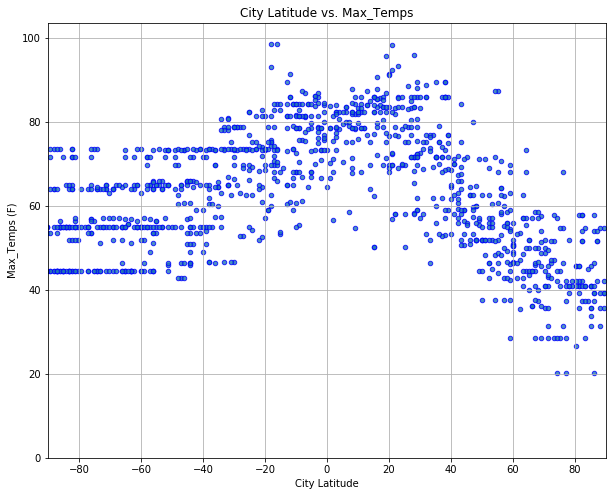

<Figure size 432x288 with 0 Axes>

In [136]:
# Generate a series for the needed columns from dataframe
ScatPlot_MaxTemps = weather_data_500['Max_Temp']
ScatPlot_Lat = weather_data_500['Latitude']

# Make lists out of the columns
List_a = ScatPlot_MaxTemps.values.tolist()
List_b = ScatPlot_Lat.values.tolist()

# Create a dataframe for plot
Listsab = {"Max_Temp": List_a,
           "Latitude": List_b}
LatTemp_ScatPlot_df = pd.DataFrame(Listsab)
LatTemp_ScatPlot_df

# Create plot
LatTemp_ScatPlot_df.plot(kind='scatter', x="Latitude", y="Max_Temp", marker="o", edgecolors="blue", alpha=0.8, figsize=(10,8))
plt.title("City Latitude vs. Max_Temps")
plt.xlabel("City Latitude")
plt.ylabel("Max_Temps (F)")
plt.xlim(-90, 90)
plt.ylim(0, (LatTemp_ScatPlot_df['Max_Temp'].max()+5))
plt.grid(True)
plt.show()
plt.tight_layout()

## Latitude vs. Humidity Plot

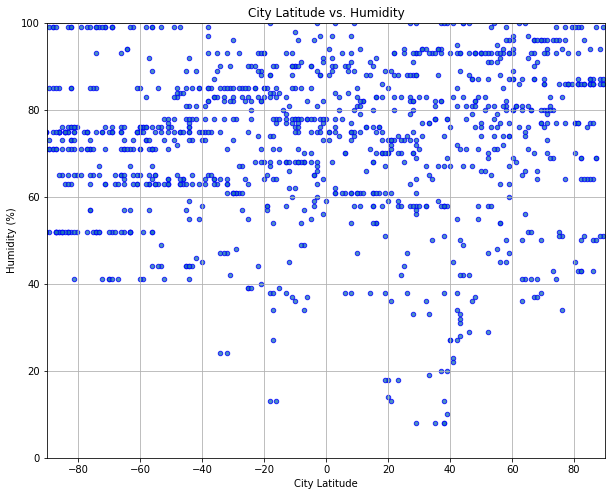

<Figure size 432x288 with 0 Axes>

In [121]:
# Generate a series for the needed columns from dataframe
ScatPlot_Hum = weather_data_500['Humidity']
ScatPlot_Lat = weather_data_500['Latitude']

# Make lists out of the columns
List_a = ScatPlot_Hum.values.tolist()
List_b = ScatPlot_Lat.values.tolist()

# Create a dataframe for plot
Listsab = {"Humidity": List_a,
           "Latitude": List_b}
LatHum_ScatPlot_df = pd.DataFrame(Listsab)
LatHum_ScatPlot_df

# Create plot
LatHum_ScatPlot_df.plot(kind='scatter', x="Latitude", y="Humidity", marker="o", edgecolors="blue", alpha=0.8, figsize=(10,8))
plt.title("City Latitude vs. Humidity")
plt.xlabel("City Latitude")
plt.ylabel("Humidity (%)")
plt.xlim(-90, 90)
plt.ylim(0, 100)
plt.grid(True)
plt.show()
plt.tight_layout()

## Latitude vs. Cloudiness Plot

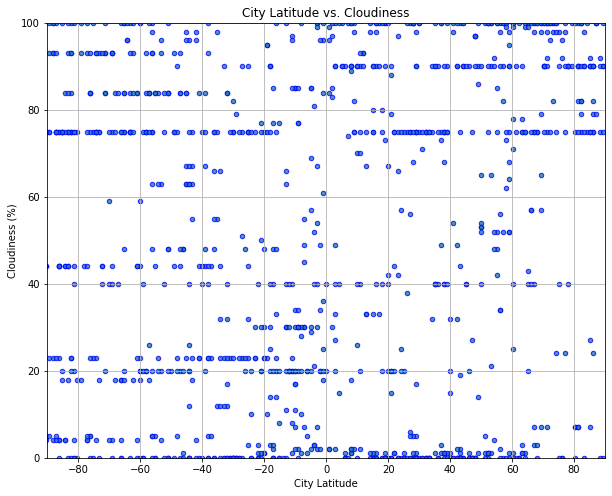

<Figure size 432x288 with 0 Axes>

In [122]:
# Generate a series for the needed columns from dataframe
ScatPlot_Cloud = weather_data_500['Cloudiness']
ScatPlot_Lat = weather_data_500['Latitude']

# Make lists out of the columns
List_a = ScatPlot_Cloud.values.tolist()
List_b = ScatPlot_Lat.values.tolist()

# Create a dataframe for plot
Listsab = {"Cloudiness": List_a,
           "Latitude": List_b}
LatCloud_ScatPlot_df = pd.DataFrame(Listsab)
LatCloud_ScatPlot_df

# Create plot
LatCloud_ScatPlot_df.plot(kind='scatter', x="Latitude", y="Cloudiness", marker="o", edgecolors="blue", alpha=0.8, figsize=(10,8))
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("City Latitude")
plt.ylabel("Cloudiness (%)")
plt.xlim(-90, 90)
plt.ylim(0, 100)
plt.grid(True)
plt.show()
plt.tight_layout()

## Latitude vs. Wind Speed Plot

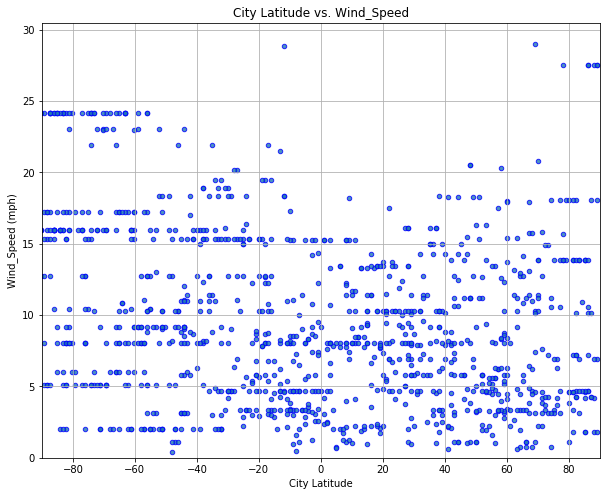

<Figure size 432x288 with 0 Axes>

In [132]:
# Generate a series for the needed columns from dataframe
ScatPlot_Wind_Speed = weather_data_500['Wind_Speed']
ScatPlot_Lat = weather_data_500['Latitude']

# Make lists out of the columns
List_a = ScatPlot_Wind_Speed.values.tolist()
List_b = ScatPlot_Lat.values.tolist()

# Create a dataframe for plot
Listsab = {"Wind_Speed": List_a,
           "Latitude": List_b}
LatWind_Speed_ScatPlot_df = pd.DataFrame(Listsab)
LatWind_Speed_ScatPlot_df
LatWind_Speed_ScatPlot_df['Wind_Speed'].max()

# Create plot
LatWind_Speed_ScatPlot_df.plot(kind='scatter', x="Latitude", y="Wind_Speed", marker="o", edgecolors="blue", alpha=0.8, figsize=(10,8))
plt.title("City Latitude vs. Wind_Speed")
plt.xlabel("City Latitude")
plt.ylabel("Wind_Speed (mph)")
plt.xlim(-90, 90)
plt.ylim(0,(LatWind_Speed_ScatPlot_df['Wind_Speed'].max()+1.5))
plt.grid(True)
plt.show()
plt.tight_layout()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation coefficient (r) is -0.8066
The p-value is 0.0
The r-squared is: 0.6506


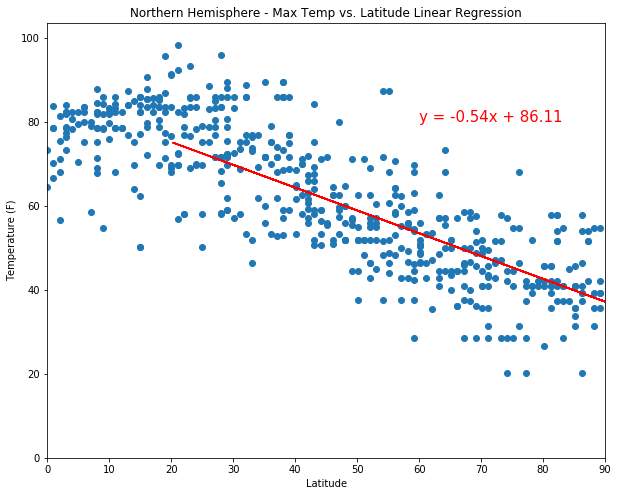

<Figure size 432x288 with 0 Axes>

In [150]:
# dataframe from scatter plot
LatTemp_ScatPlot_df
NorthHem_LatTemp_ScatPlot_df = LatTemp_ScatPlot_df[LatTemp_ScatPlot_df.Latitude>=0]

#  CORRELATION COEFFICIENT
MaxTemp = NorthHem_LatTemp_ScatPlot_df['Max_Temp']
Latitude = NorthHem_LatTemp_ScatPlot_df['Latitude']
correlation = sts.pearsonr(Latitude, MaxTemp)

print(f"The correlation coefficient (r) is {round(correlation[0],4)}")
print(f"The p-value is {round(correlation[1],11)}")

#  LINEAR REGRESSION MODEL 
# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = linregress(Latitude, MaxTemp)

# Calculate the predictions for each value of x
regression_values = MaxTemp * slope + intercept

# store a string version of the linear equation, so we can display it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot
plt.figure(figsize=(10,8))
plt.scatter(Latitude, MaxTemp)

# Plot the regression line
plt.plot(MaxTemp, regression_values, "red")

# Annotate the plot with the linear equation
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.annotate(line_eq, (60,80), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.xlim(0, 90)
plt.ylim(0, (LatTemp_ScatPlot_df['Max_Temp'].max()+5))
print(f"The r-squared is: {round(rvalue**2,4)}")
plt.show()
plt.tight_layout()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation coefficient (r) is 0.6474
The p-value is 0.0
The r-squared is: 0.4191


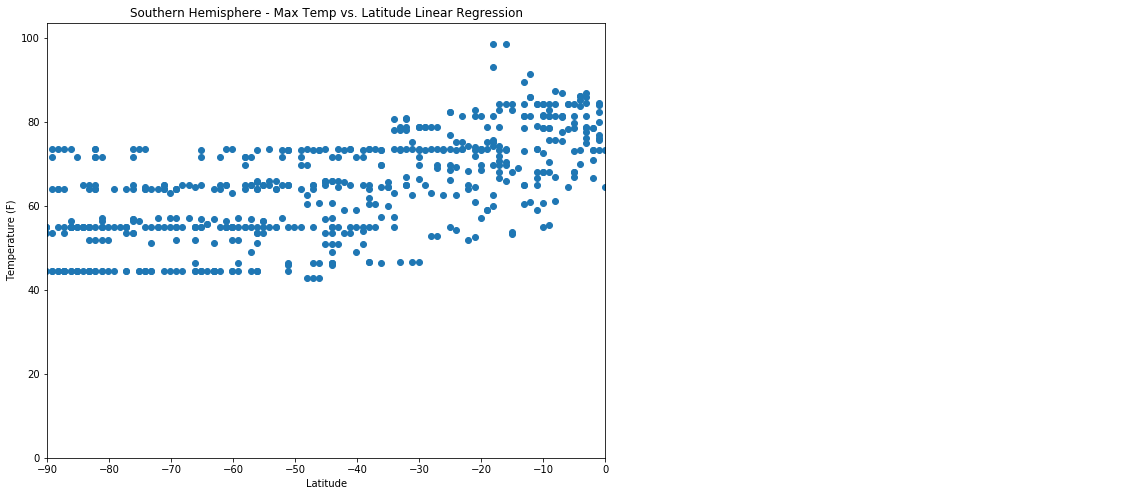

<Figure size 432x288 with 0 Axes>

In [155]:
# dataframe from scatter plot
LatTemp_ScatPlot_df
SouthHem_LatTemp_ScatPlot_df = LatTemp_ScatPlot_df[LatTemp_ScatPlot_df.Latitude<=0]

#  CORRELATION COEFFICIENT
MaxTemp = SouthHem_LatTemp_ScatPlot_df['Max_Temp']
Latitude = SouthHem_LatTemp_ScatPlot_df['Latitude']
correlation = sts.pearsonr(Latitude, MaxTemp)

print(f"The correlation coefficient (r) is {round(correlation[0],4)}")
print(f"The p-value is {round(correlation[1],11)}")

#  LINEAR REGRESSION MODEL 
# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = linregress(Latitude, MaxTemp)

# Calculate the predictions for each value of x
regression_values = MaxTemp * slope + intercept

# store a string version of the linear equation, so we can display it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot
plt.figure(figsize=(10,8))
plt.scatter(Latitude, MaxTemp)

# Plot the regression line
plt.plot(MaxTemp, regression_values, "red")

# Annotate the plot with the linear equation
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.annotate(line_eq, (60,80), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.xlim(-90, 0)
plt.ylim(0, (LatTemp_ScatPlot_df['Max_Temp'].max()+5))
print(f"The r-squared is: {round(rvalue**2,4)}")
plt.show()
plt.tight_layout()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation coefficient (r) is 0.1052
The p-value is 0.01423629521
The r-squared is: 0.0111


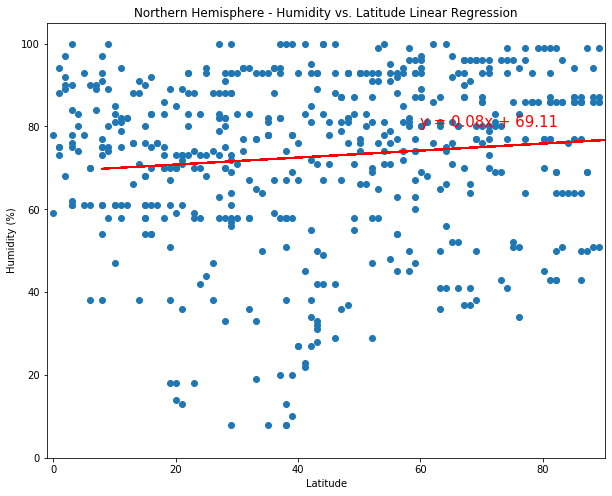

<Figure size 432x288 with 0 Axes>

In [160]:
# dataframe from scatter plot
LatHum_ScatPlot_df
NorthHem_LatHum_ScatPlot_df = LatHum_ScatPlot_df[LatHum_ScatPlot_df.Latitude>=0]

#  CORRELATION COEFFICIENT
Humidity = NorthHem_LatHum_ScatPlot_df['Humidity']
Latitude = NorthHem_LatHum_ScatPlot_df['Latitude']
correlation = sts.pearsonr(Latitude, Humidity)

print(f"The correlation coefficient (r) is {round(correlation[0],4)}")
print(f"The p-value is {round(correlation[1],11)}")

#  LINEAR REGRESSION MODEL 
# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = linregress(Latitude, Humidity)

# Calculate the predictions for each value of x
regression_values = Humidity * slope + intercept

# store a string version of the linear equation, so we can display it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot
plt.figure(figsize=(10,8))
plt.scatter(Latitude, Humidity)

# Plot the regression line
plt.plot(Humidity, regression_values, "red")

# Annotate the plot with the linear equation
plt.title("Northern Hemisphere - Humidity vs. Latitude Linear Regression")
plt.annotate(line_eq, (60,80), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.xlim((NorthHem_LatHum_ScatPlot_df['Latitude'].min()-1), (NorthHem_LatHum_ScatPlot_df['Latitude'].max()+1))
plt.ylim(0, (LatHum_ScatPlot_df['Humidity'].max()+5))
print(f"The r-squared is: {round(rvalue**2,4)}")
plt.show()
plt.tight_layout()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation coefficient (r) is 0.0512
The p-value is 0.22160072633
The r-squared is: 0.0026


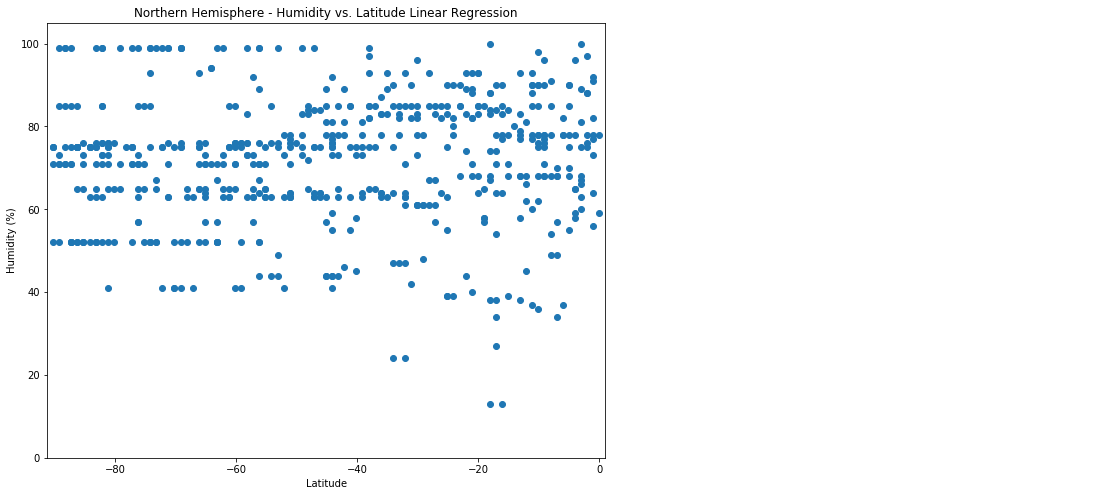

<Figure size 432x288 with 0 Axes>

In [161]:
# dataframe from scatter plot
LatHum_ScatPlot_df
SouthHem_LatHum_ScatPlot_df = LatHum_ScatPlot_df[LatHum_ScatPlot_df.Latitude<=0]

#  CORRELATION COEFFICIENT
Humidity = SouthHem_LatHum_ScatPlot_df['Humidity']
Latitude = SouthHem_LatHum_ScatPlot_df['Latitude']
correlation = sts.pearsonr(Latitude, Humidity)

print(f"The correlation coefficient (r) is {round(correlation[0],4)}")
print(f"The p-value is {round(correlation[1],11)}")

#  LINEAR REGRESSION MODEL 
# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = linregress(Latitude, Humidity)

# Calculate the predictions for each value of x
regression_values = Humidity * slope + intercept

# store a string version of the linear equation, so we can display it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot
plt.figure(figsize=(10,8))
plt.scatter(Latitude, Humidity)

# Plot the regression line
plt.plot(Humidity, regression_values, "red")

# Annotate the plot with the linear equation
plt.title("Northern Hemisphere - Humidity vs. Latitude Linear Regression")
plt.annotate(line_eq, (60,80), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.xlim((SouthHem_LatHum_ScatPlot_df['Latitude'].min()-1), (SouthHem_LatHum_ScatPlot_df['Latitude'].max()+1))
plt.ylim(0, (LatHum_ScatPlot_df['Humidity'].max()+5))
print(f"The r-squared is: {round(rvalue**2,4)}")
plt.show()
plt.tight_layout()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation coefficient (r) is 0.209
The p-value is 9.1588e-07
The r-squared is: 0.0437


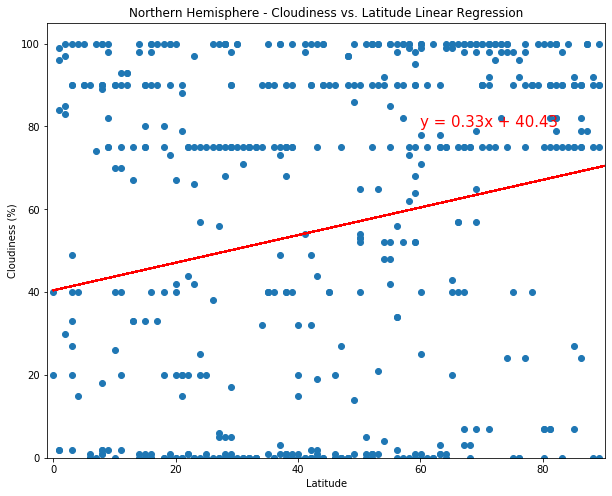

<Figure size 432x288 with 0 Axes>

In [175]:
# dataframe from scatter plot
LatCloud_ScatPlot_df
NorthHem_LatCloud_ScatPlot_df = LatCloud_ScatPlot_df[LatCloud_ScatPlot_df.Latitude>=0]

#  CORRELATION COEFFICIENT
Cloud = NorthHem_LatCloud_ScatPlot_df['Cloudiness']
Latitude = NorthHem_LatCloud_ScatPlot_df['Latitude']
correlation = sts.pearsonr(Latitude, Cloud)

print(f"The correlation coefficient (r) is {round(correlation[0],4)}")
print(f"The p-value is {round(correlation[1],11)}")

#  LINEAR REGRESSION MODEL 
# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = linregress(Latitude, Cloud)

# Calculate the predictions for each value of x
regression_values = Cloud * slope + intercept

# store a string version of the linear equation, so we can display it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot
plt.figure(figsize=(10,8))
plt.scatter(Latitude, Cloud)

# Plot the regression line
plt.plot(Cloud, regression_values, "red")

# Annotate the plot with the linear equation
plt.title("Northern Hemisphere - Cloudiness vs. Latitude Linear Regression")
plt.annotate(line_eq, (60,80), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.xlim((NorthHem_LatCloud_ScatPlot_df['Latitude'].min()-1), (NorthHem_LatCloud_ScatPlot_df['Latitude'].max()+1))
plt.ylim(0, (NorthHem_LatCloud_ScatPlot_df['Cloudiness'].max()+5))
print(f"The r-squared is: {round(rvalue**2,4)}")
plt.show()
plt.tight_layout()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation coefficient (r) is -0.2071
The p-value is 5.9411e-07
The r-squared is: 0.0429


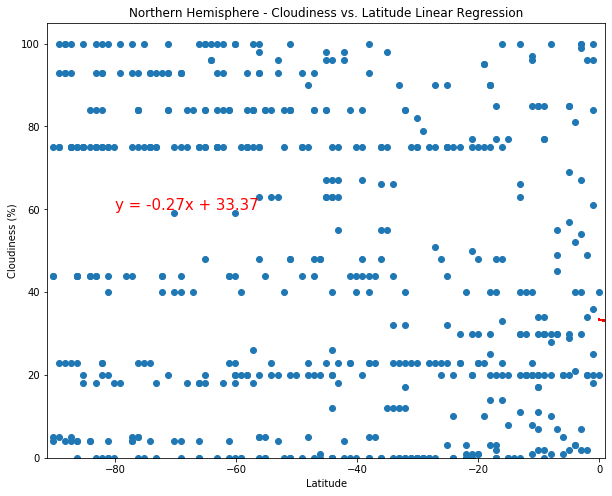

<Figure size 432x288 with 0 Axes>

In [177]:
# dataframe from scatter plot
LatCloud_ScatPlot_df
SouthHem_LatCloud_ScatPlot_df = LatCloud_ScatPlot_df[LatCloud_ScatPlot_df.Latitude<=0]

#  CORRELATION COEFFICIENT
Cloud = SouthHem_LatCloud_ScatPlot_df['Cloudiness']
Latitude = SouthHem_LatCloud_ScatPlot_df['Latitude']
correlation = sts.pearsonr(Latitude, Cloud)

print(f"The correlation coefficient (r) is {round(correlation[0],4)}")
print(f"The p-value is {round(correlation[1],11)}")

#  LINEAR REGRESSION MODEL 
# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = linregress(Latitude, Cloud)

# Calculate the predictions for each value of x
regression_values = Cloud * slope + intercept

# store a string version of the linear equation, so we can display it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot
plt.figure(figsize=(10,8))
plt.scatter(Latitude, Cloud)

# Plot the regression line
plt.plot(Cloud, regression_values, "red")

# Annotate the plot with the linear equation
plt.title("Northern Hemisphere - Cloudiness vs. Latitude Linear Regression")
plt.annotate(line_eq, (-80,60), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.xlim((SouthHem_LatCloud_ScatPlot_df['Latitude'].min()-1), (SouthHem_LatCloud_ScatPlot_df['Latitude'].max()+1))
plt.ylim(0, (SouthHem_LatCloud_ScatPlot_df['Cloudiness'].max()+5))
print(f"The r-squared is: {round(rvalue**2,4)}")
plt.show()
plt.tight_layout()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation coefficient (r) is 0.0745
The p-value is 0.08305667858
The r-squared is: 0.0056


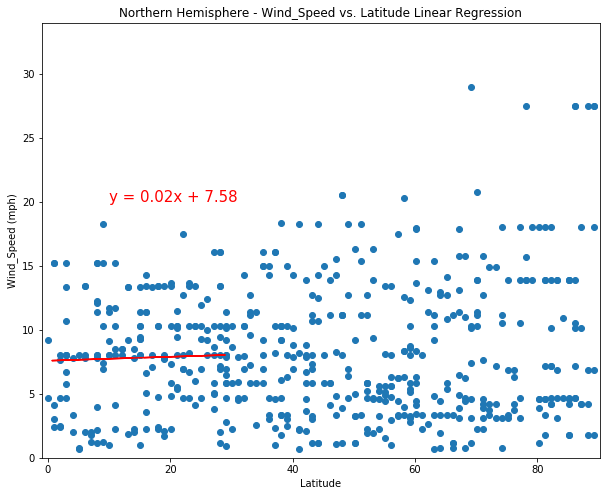

<Figure size 432x288 with 0 Axes>

In [178]:
# dataframe from scatter plot
LatWind_Speed_ScatPlot_df
NorthHem_LatWind_Speed_ScatPlot_df = LatWind_Speed_ScatPlot_df[LatWind_Speed_ScatPlot_df.Latitude>=0]

#  CORRELATION COEFFICIENT
Wind = NorthHem_LatWind_Speed_ScatPlot_df['Wind_Speed']
Latitude = NorthHem_LatWind_Speed_ScatPlot_df['Latitude']
correlation = sts.pearsonr(Latitude, Wind)

print(f"The correlation coefficient (r) is {round(correlation[0],4)}")
print(f"The p-value is {round(correlation[1],11)}")

#  LINEAR REGRESSION MODEL 
# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = linregress(Latitude, Wind)

# Calculate the predictions for each value of x
regression_values = Wind * slope + intercept

# store a string version of the linear equation, so we can display it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot
plt.figure(figsize=(10,8))
plt.scatter(Latitude, Wind)

# Plot the regression line
plt.plot(Wind, regression_values, "red")

# Annotate the plot with the linear equation
plt.title("Northern Hemisphere - Wind_Speed vs. Latitude Linear Regression")
plt.annotate(line_eq, (10,20), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind_Speed (mph)')
plt.xlim((NorthHem_LatWind_Speed_ScatPlot_df['Latitude'].min()-1), (NorthHem_LatWind_Speed_ScatPlot_df['Latitude'].max()+1))
plt.ylim(0, (NorthHem_LatWind_Speed_ScatPlot_df['Wind_Speed'].max()+5))
print(f"The r-squared is: {round(rvalue**2,4)}")
plt.show()
plt.tight_layout()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation coefficient (r) is -0.3638
The p-value is 0.0
The r-squared is: 0.1323


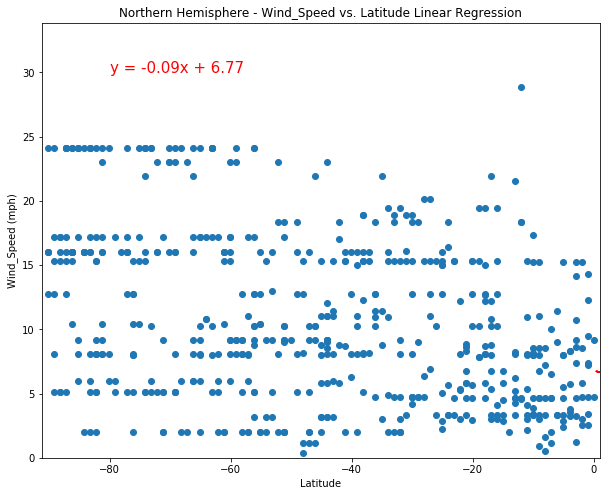

<Figure size 432x288 with 0 Axes>

In [184]:
# dataframe from scatter plot
LatWind_Speed_ScatPlot_df
SouthHem_LatWind_Speed_ScatPlot_df = LatWind_Speed_ScatPlot_df[LatWind_Speed_ScatPlot_df.Latitude<=0]

#  CORRELATION COEFFICIENT
Wind = SouthHem_LatWind_Speed_ScatPlot_df['Wind_Speed']
Latitude = SouthHem_LatWind_Speed_ScatPlot_df['Latitude']
correlation = sts.pearsonr(Latitude, Wind)

print(f"The correlation coefficient (r) is {round(correlation[0],4)}")
print(f"The p-value is {round(correlation[1],11)}")

#  LINEAR REGRESSION MODEL 
# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = linregress(Latitude, Wind)

# Calculate the predictions for each value of x
regression_values = Wind * slope + intercept

# store a string version of the linear equation, so we can display it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot
plt.figure(figsize=(10,8))
plt.scatter(Latitude, Wind)

# Plot the regression line
plt.plot(Wind, regression_values, "red")

# Annotate the plot with the linear equation
plt.title("Northern Hemisphere - Wind_Speed vs. Latitude Linear Regression")
plt.annotate(line_eq, (-80,30), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind_Speed (mph)')
plt.xlim((SouthHem_LatWind_Speed_ScatPlot_df['Latitude'].min()-1), (SouthHem_LatWind_Speed_ScatPlot_df['Latitude'].max()+1))
plt.ylim(0, (SouthHem_LatWind_Speed_ScatPlot_df['Wind_Speed'].max()+5))
print(f"The r-squared is: {round(rvalue**2,4)}")
plt.show()
plt.tight_layout()